In [40]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [41]:
RegSeasonResults = pd.read_csv("RegularSeasonCompactResults.csv")
teams = pd.read_csv("teams.csv")
teams.dtypes

TeamID            int64
TeamName         object
FirstD1Season     int64
LastD1Season      int64
dtype: object

In [54]:
RegSeasonResults.dtypes

Season        int64
DayNum        int64
WTeamID       int64
WScore        int64
LTeamID       int64
LScore        int64
WLoc          int64
NumOT         int64
WLocCode      int64
WElo        float64
LElo        float64
dtype: object

In [42]:
RegSeasonResults['WLocCode'] = 1 
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
RegSeasonResults.WLoc.replace('N',0,inplace=True)
RegSeasonResults.WLoc.replace('A',-1,inplace=True)
RegSeasonResults.WLoc.replace('H',1,inplace=True)



In [43]:
seasonNumber = 1985
index_for_each_year = []
index_for_each_year.append(0)
for i in RegSeasonResults.iterrows():
    if(i[1].Season == seasonNumber+1):
        index_for_each_year.append(i[0])
        seasonNumber = seasonNumber + 1
  


In [44]:
RegSeasonResults['WElo'] = 0.000000000000 
RegSeasonResults['LElo'] = 0.000000000000
seasonNumber = 1985
for i in range(len(index_for_each_year)-1):
    temp = RegSeasonResults[index_for_each_year[i]:index_for_each_year[i+1]]
    elo_dict = {}
    k = 5    
    for j in teams.TeamID:
        elo_dict[j] = 0
    x = 0
    for j in temp.iterrows():
    ###########################################################################################
    #######New logic####### 
    
        winner_rating = pow(10,(elo_dict[j[1].WTeamID])/400)
        loser_rating = pow(10,(elo_dict[j[1].LTeamID])/400)
    
        expected_winner = winner_rating/(winner_rating+loser_rating) 
        expected_loser = loser_rating/(winner_rating+loser_rating)
    
        winner = 1
        loser = 0
    
        new_winner_rating = elo_dict[j[1].WTeamID] + k * (winner-expected_winner)
        new_loser_rating = elo_dict[j[1].LTeamID] + k * (loser-expected_loser)


        elo_dict[j[1].WTeamID] = new_winner_rating
        elo_dict[j[1].LTeamID] = new_loser_rating

        
        temp.iat[x,9] = new_winner_rating
        temp.iat[x,10] = new_loser_rating

        x = x + 1
    
    row_incr = 0
    teams[str(i+1985)] = 0.000000000000
    for row in teams.iterrows():
        teams.iat[row_incr,i+4] = elo_dict[row[1].TeamID]
        row_incr = row_incr + 1
#     if (j[1].WTeamID == 1102 or j[1].LTeamID == 1102):
#         print (j[1].WScore)
#         print (j[1].LScore)
#         print(elo_dict[1102])
    
    

In [7]:
for i in teams.TeamID:
    elo_dict[i] = 0
i = 0
RegSeasonResults.dtypes

Season        int64
DayNum        int64
WTeamID       int64
WScore        int64
LTeamID       int64
LScore        int64
WLoc          int64
NumOT         int64
WLocCode      int64
WElo        float64
LElo        float64
dtype: object

In [8]:
for j in temp.iterrows():
    ###########################################################################################
    #######New logic####### 
    
    winner_rating = pow(10,(elo_dict[j[1].WTeamID])/400)
    loser_rating = pow(10,(elo_dict[j[1].LTeamID])/400)
    
    expected_winner = winner_rating/(winner_rating+loser_rating) 
    expected_loser = loser_rating/(winner_rating+loser_rating)
    
    winner = 1
    loser = 0
    
    new_winner_rating = elo_dict[j[1].WTeamID] + k * (winner-expected_winner)
    new_loser_rating = elo_dict[j[1].LTeamID] + k * (loser-expected_loser)
    ###########################################################################################
#     a =  1/(1+pow(10,((elo_dict[j[1].WTeamID]-elo_dict[j[1].LTeamID])/100)))
#     b =  1/(1+pow(10,((elo_dict[j[1].LTeamID]-elo_dict[j[1].WTeamID])/100)))
#     a_new = elo_dict[j[1].WTeamID] + k*(j[1].WScore/100 - a)
#     b_new = elo_dict[j[1].LTeamID] - k*(j[1].LScore/100 - b)
    elo_dict[j[1].WTeamID] = new_winner_rating
    elo_dict[j[1].LTeamID] = new_loser_rating

    temp.iat[i,9] = new_winner_rating
    temp.iat[i,10] = new_loser_rating

    i = i + 1
#     if (j[1].WTeamID == 1102 or j[1].LTeamID == 1102):
#         print (j[1].WScore)
#         print (j[1].LScore)
#         print(elo_dict[1102])
    

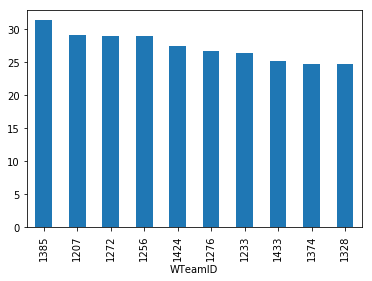

In [9]:
temp.groupby('WTeamID')['WElo'].mean().nlargest(10).plot(kind='bar')

In [10]:
################################################
#This is where the code to compute a final rating of normailsed factors affecting the full 
#rating goes. 
#We need a multitude of factors. Elo rating is one of them. We need more because these are historical factors
#that consider their form since 1985 which may not be relevant for 2018. 
#So we need to see the following as well. 
#Seed,Last 3 year form, wins versus loses in regular season as well as conference championship.
#
#
#
#


In [11]:
# finally we create the output file. 
sub_stage1 = pd.DataFrame()
sub_stage1['game'] = {}
sub_stage1['probailities'] = {}
for i in range():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-11-ccc63e32bdec>, line 6)